In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
file = fits.open('/home/aarya/ss21-astronomy-tasks/data/gll_iem_v02_P6_V11_DIFFUSE.fit')

In [3]:
file;

In [4]:
file.info()
print('THere are 2 HDUs.')

Filename: /home/aarya/ss21-astronomy-tasks/data/gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   
THere are 2 HDUs.


In [5]:
file1 = file[0]
file1.header

SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      
BITPIX  =                  -32 /                                                
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  720 / length of data axis 1                          
NAXIS2  =                  360 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FLUX    =        8.42259635886 /                                                
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                  0.5 / Step size in longitude                         
CRPIX1  =                360

In [6]:
info_list = ['Length of axis 3 is 30','Axis 3 denotes photon energy','Unit of axis 3 is MeV','The name of the telescope is GLAST','THe name of the observer is MICHELSON']
info_list

['Length of axis 3 is 30',
 'Axis 3 denotes photon energy',
 'Unit of axis 3 is MeV',
 'The name of the telescope is GLAST',
 'THe name of the observer is MICHELSON']

In [7]:
data = file1.data

data1 = data[0]
print('Max:', np.max(data1))
print('Min:', np.min(data1))
print('Stdev:', np.std(data1))

Max: 4.5921523e-05
Min: 7.027717e-08
Stdev: 1.3843595e-06


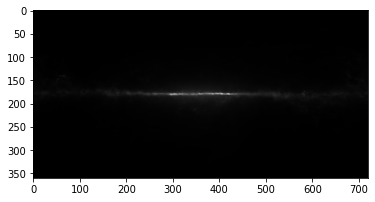

In [8]:
plt.imshow(data1, cmap='gray', vmin = 7.027717e-08, vmax = 4.5921523e-05)

In [9]:
z,x,y = data.shape
arr = np.zeros((x,y))
for i in range(z):
    if(i%5 == 4):
        arr = arr + data[i]

print('Max:', np.max(arr))
print('Min:', np.min(arr))
print('Stdev:', np.std(arr))

Max: 1.090754324492918e-05
Min: 1.2774164938546379e-08
Stdev: 3.5807245824365337e-07


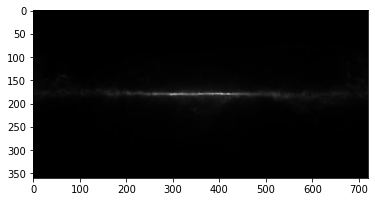

In [10]:
plt.imshow(arr, cmap='gray', vmin = 1.2774164938546379e-08, vmax = 1.090754324492918e-05)

In [11]:
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

In [12]:
def altitude(coordinates, time):
    iitm = EarthLocation(lat = 12.992*u.deg, lon = 80.234*u.deg, height = 50*u.m)
    time1 = Time(time) - 5.5*u.hour
    time_arr = []
    for n in range(13):
        time_arr.append(time1 + n*u.hour)
        
    alt_arr = (coordinates.transform_to(AltAz(obstime = time_arr, location = iitm)).alt.deg)
    time_interval = np.arange(13) 
    
    plt.plot(time_interval,alt_arr)
    plt.xlabel('Time Frame over a span of 12 hours (from the given time)')
    plt.ylabel('Altitude (in Degrees)')
    plt.title('Plot for Altitude vs Time')
    plt.show()

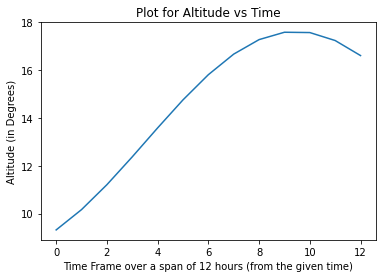

In [13]:
coordinate_data = SkyCoord(12.11*u.deg, 85.26*u.deg)
time_data = '2021-7-14 20:00:00'
altitude(coordinate_data,time_data)